# `Medical Insurance Cost Project`

`Project Description `   
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .  

Columns:                                            
- `age`: age of primary beneficiary
- `sex`: insurance contractor gender, female, male
- `bmi`: Body mass index, providing an understanding of body, weights that are relatively high or low relative to - - - height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoking
- `region`: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges`: Individual medical costs billed by health insurance

In [164]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [165]:

df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
# summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [167]:
# to check the missing values in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [168]:
# checking for duplicate values
df.duplicated().sum()


1

In [169]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [170]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

---
> ### Intial Observation
> - Its a regression problem
> - 6 independent features ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] and 1 dependent feature ['charges']
> - 2 Numerical features - 'age', 'bmi'
> - 3 Categorical feature - 'sex', 'smoker', 'region'
> - children column is numerical descrete value but its categorical in nature
---

In [171]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Composition

### Age Column

<Axes: xlabel='age', ylabel='Count'>

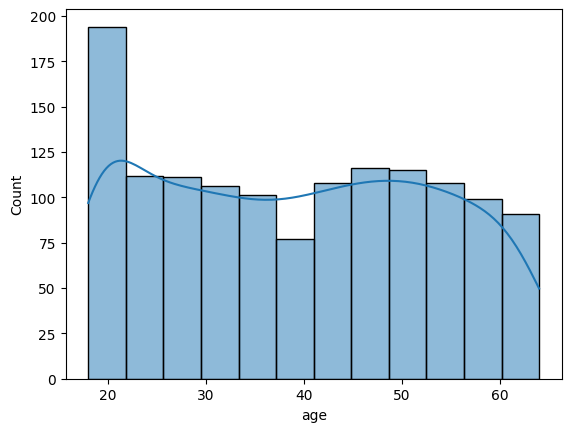

In [172]:
sns.histplot(df.age,kde=True)

- Age of the distributed fairely

### Sex column

<Axes: xlabel='sex', ylabel='Count'>

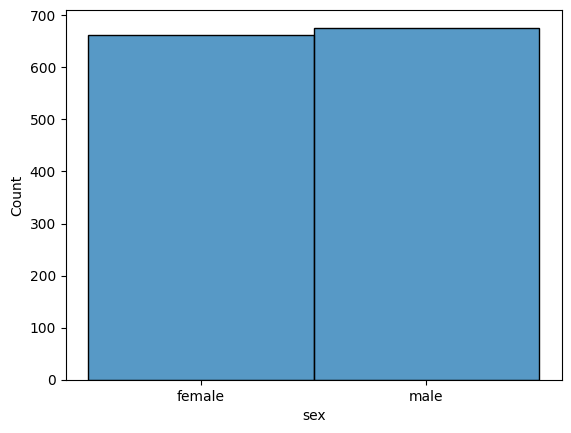

In [173]:
sns.histplot(df.sex)

- Person who collected the data has approached each gender without any bias
 

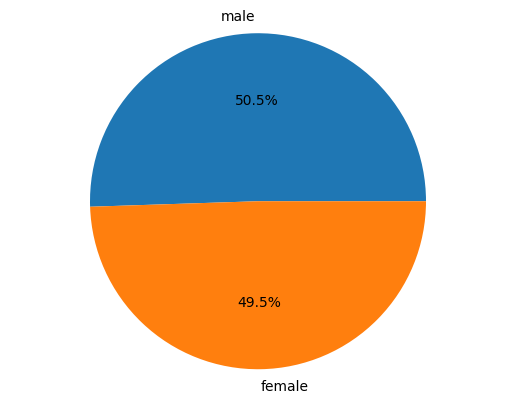

In [174]:
# count the frequency of each sex
sex_counts = df['sex'].value_counts()

# plot the pie chart
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')

plt.axis('equal')
plt.show()


### bmi column

<Axes: xlabel='bmi', ylabel='Count'>

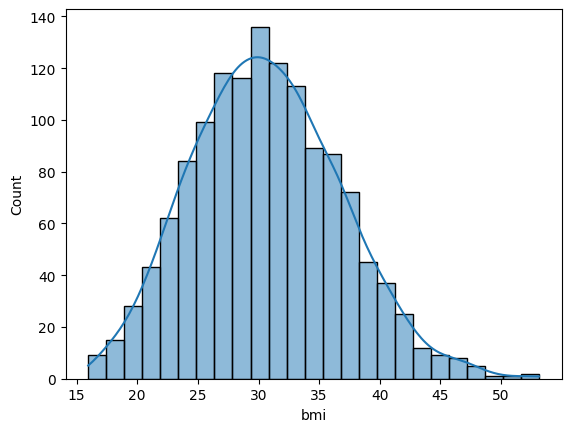

In [175]:
sns.histplot(df.bmi,kde=True)

- Normally distributed Data [ underweight to overweight ]

### children column

<Axes: xlabel='children', ylabel='Count'>

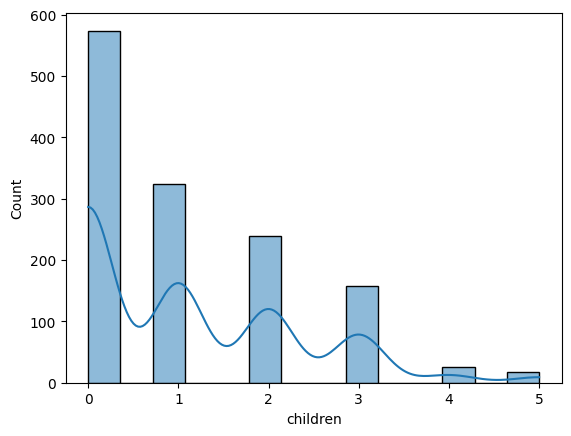

In [176]:
sns.histplot(df.children,kde=True)

In [177]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

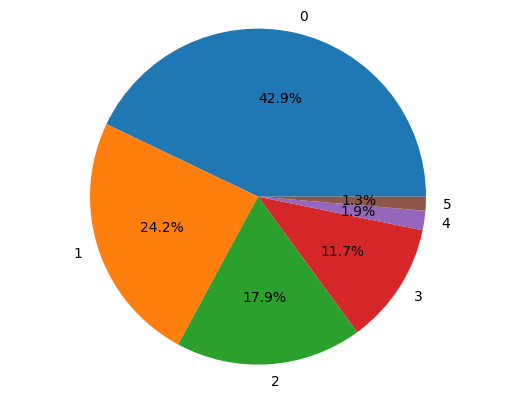

In [178]:
# count the frequency of each sex
children_counts = df['children'].value_counts()

# plot the pie chart
plt.pie(children_counts.values, labels=children_counts.index, autopct='%1.1f%%')

plt.axis('equal')
plt.show()


- Children column has decrete categorical data

### smoker column

<Axes: xlabel='smoker', ylabel='Count'>

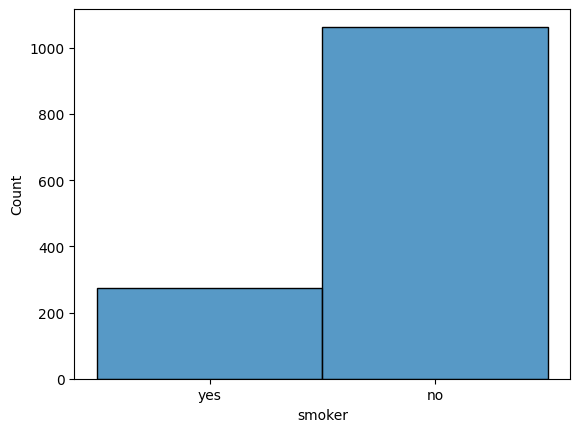

In [179]:
sns.histplot(df.smoker)

- There are higher number of non smokers than ones who smokes

### region column

<Axes: xlabel='region', ylabel='Count'>

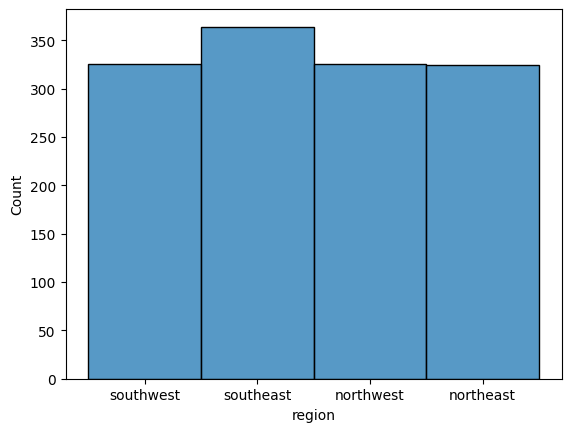

In [180]:
sns.histplot(df.region)

- Uniform distribution of data collected across the region

### charges column { Target variable}


<Axes: xlabel='charges', ylabel='Count'>

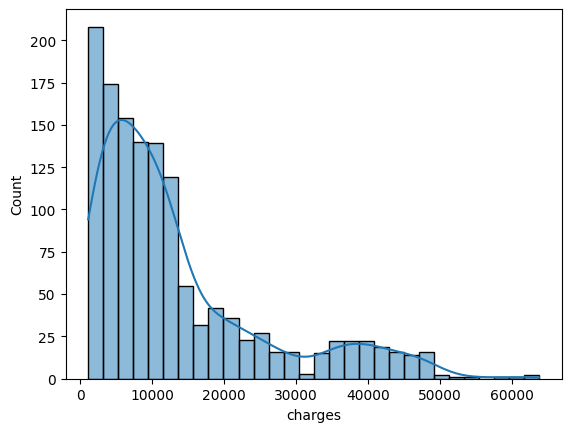

In [181]:
sns.histplot(df.charges,kde=True)

# Realtionships between features

<Axes: xlabel='smoker', ylabel='count'>

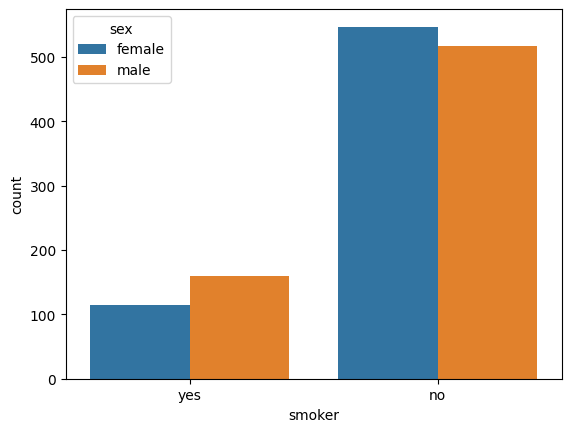

In [182]:
# seeing which gender has higher smoker count
sns.countplot(df, x= 'smoker',hue='sex')

- Its clear that number of smoker in either gender are very similar
- And there are high number of people who doesnt smoke as compared to one who smokes.

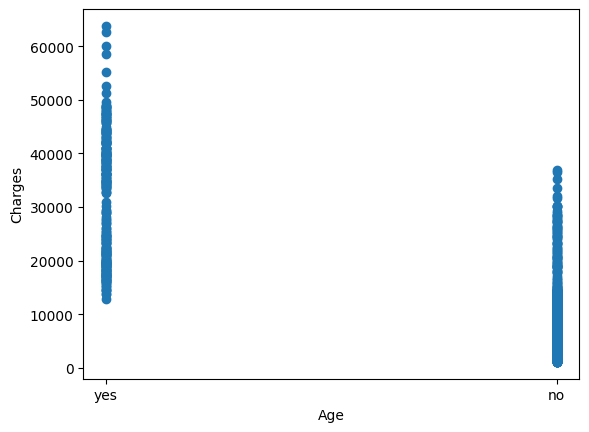

In [183]:
# Realationship between being smoker and charges
plt.scatter(df['smoker'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

- Conclusion : If a person is a smoker he/she gets charged more for the insurance as comapred to non-smokers 


## Data Preprocessing

## Encoding

In [184]:
# Convert categorical variables into numerical representations
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

## Correlation

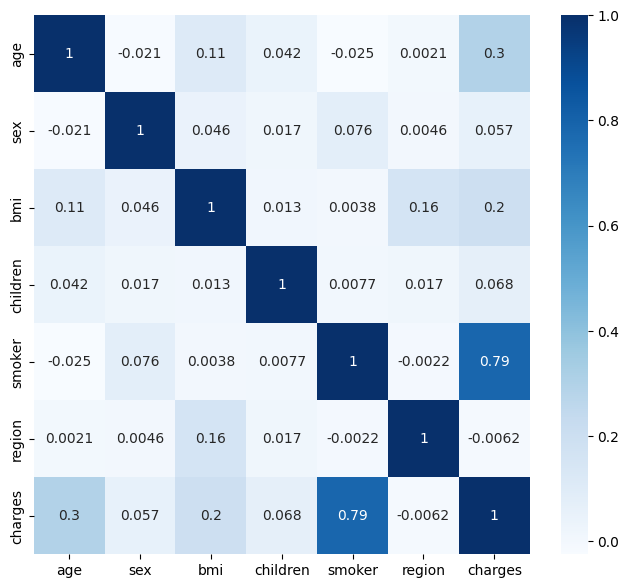

In [185]:
#plotting a heat map to find the correlation between the numerical features
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

Note : Smoker column is highly positively correlated to charges

In [186]:
x = df.drop('charges', axis=1)
y = df['charges']

## Model Training and Evaluation

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler as sc


In [197]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create the scaler objects
feature_scaler = sc()
target_scaler = sc()

# Fit and transform the features
x_train_scaled = feature_scaler.fit_transform(x_train)
x_test_scaled = feature_scaler.transform(x_test)

# Fit and transform the target variable
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Step 3: Model Training and Evaluation
regressors = [
    LinearRegression(),
    Ridge(alpha=0.5),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    SVR(kernel='linear'),
    SVR(kernel='rbf')
]

results = []

for regressor in regressors:
    # Train the model
    regressor.fit(x_train_scaled, y_train_scaled)

    # Make predictions on the testing set
    y_pred_scaled = regressor.predict(x_test_scaled)

    
    # Inverse transform the scaled predictions
    y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1,1))

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Regressor': regressor.__class__.__name__, 'MSE': mse, 'R^2': r2})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)


                   Regressor           MSE       R^2
0           LinearRegression  3.517415e+07  0.766891
1                      Ridge  3.517651e+07  0.766875
2                      Lasso  4.037642e+07  0.732414
3                 ElasticNet  3.819153e+07  0.746894
4      DecisionTreeRegressor  3.997583e+07  0.735068
5      RandomForestRegressor  2.306281e+07  0.847156
6  GradientBoostingRegressor  2.109167e+07  0.860219
7                        SVR  4.146992e+07  0.725167
8                        SVR  2.190789e+07  0.854810


In [205]:
results_df['MSE']

0    3.517415e+07
1    3.517651e+07
2    4.037642e+07
3    3.819153e+07
4    3.997583e+07
5    2.306281e+07
6    2.109167e+07
7    4.146992e+07
8    2.190789e+07
Name: MSE, dtype: float64

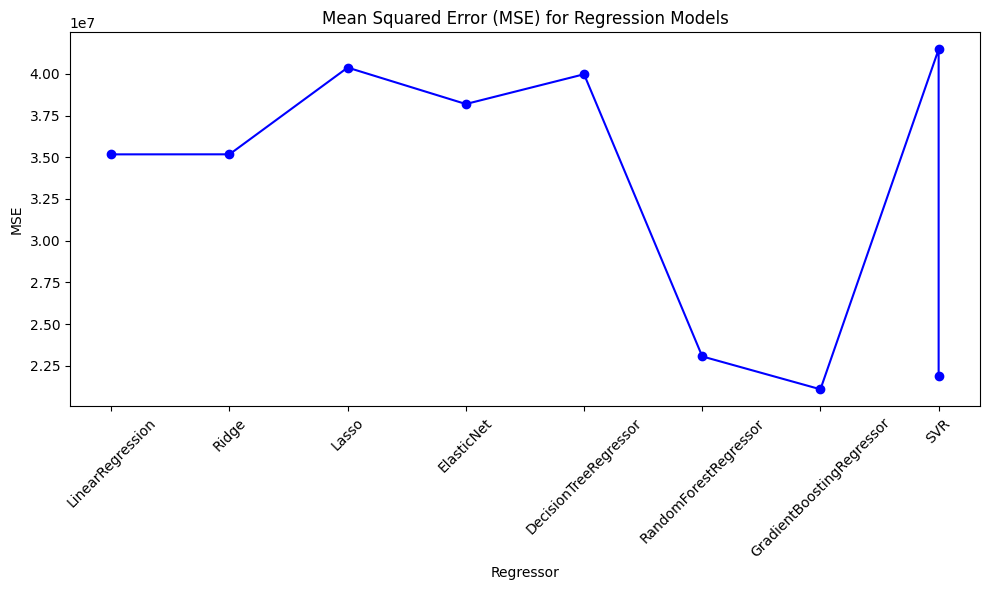

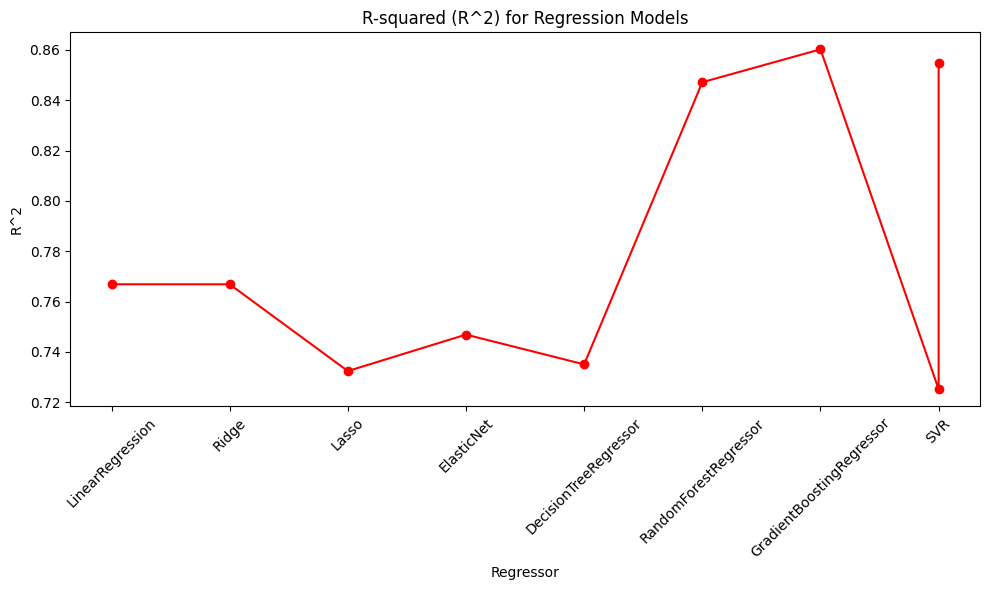

In [206]:
import matplotlib.pyplot as plt

regressors = results_df['Regressor']
mse_values = results_df['MSE']
r2_values = results_df['R^2']

# Plotting the MSE values
plt.figure(figsize=(10, 6))
plt.plot(regressors, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Regressor')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the R^2 values
plt.figure(figsize=(10, 6))
plt.plot(regressors, r2_values, marker='o', linestyle='-', color='r')
plt.xlabel('Regressor')
plt.ylabel('R^2')
plt.title('R-squared (R^2) for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
## Conclusion:
### - Gradient boosting Regressor is working the best among the tested regressor as it has Lowest MSE and the Highest R^2 value
### - Smoker column is the most influencing when it comes to charges

---